In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.costs = []
        
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) * np.random.randn()
        self.bias = np.random.randn()
        
        for _ in range(self.n_iters):
            diff = np.dot(X, self.weights) + self.bias - Y
            dw = np.dot(X.T, diff) / n_samples
            db = np.sum(diff) / n_samples
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            self.costs.append(sum(diff**2)/n_samples)
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df = df[['LotArea', 'GrLivArea', 'SalePrice']].apply(lambda x: x/10000)

In [6]:
df.head()

,LotArea,GrLivArea,SalePrice
0,0.845,0.1710,20.85
1,0.960,0.1262,18.15
2,1.125,0.1786,22.35
3,0.955,0.1717,14.00
4,1.426,0.2198,25.00


In [7]:
X, Y = np.array([df['LotArea'], df['GrLivArea']]), np.array(df['SalePrice'])
X = X.T

In [8]:
regressor = LinearRegression(0.01, 100000)

In [9]:
regressor.fit(X, Y)

In [10]:
regressor.weights, regressor.bias

(array([ 0.77220439, 95.65662194]), 2.7864253050176195)

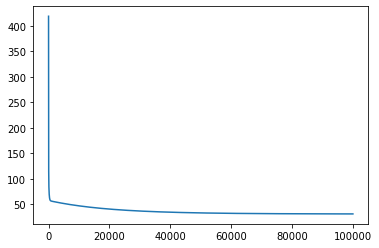

In [11]:
plt.plot(regressor.costs)

In [12]:
regressor.costs[-1]

31.163882022388872

In [13]:
pd.DataFrame([regressor.predict(X), Y], index=['Prediction', 'Actual']).transpose().corr()

,Prediction,Actual
Prediction,1.00000,0.71286
Actual,0.71286,1.00000


In [14]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [15]:
testX = np.array([test['LotArea'], test['GrLivArea']]).T / 10000
testPred = regressor.predict(testX) * 10000

In [16]:
pred = pd.DataFrame(testPred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('submission.csv', index=False)

In [17]:
datasets

,Id,SalePrice
0,1461,122547.145730
1,1462,166008.943642
2,1463,194368.476905
3,1464,189002.530046
4,1465,154169.612105
...,...,...
1454,2915,133816.271907
1455,2916,133783.839323
1456,2917,160392.046107
1457,2918,128713.762369
